구글이 공개한 사전훈련 모델. 

### 1. BERT의 개요
---------------------
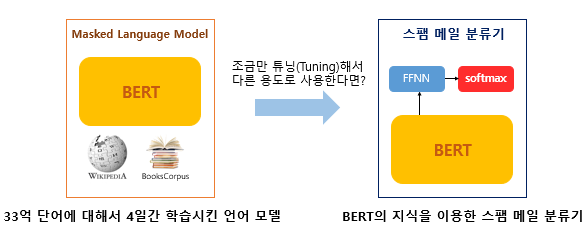

BERT는 트랜스포머를 이용해 만들어진 것으로 위키피디아(25억 단어)와 BooksCorpus(8억단어)와 같은 레이블이 없는 텍스트 데이터로 사전 훈련된 언어 모델임

BERT가 높은 성능을 얻을 수 있었던 것은 레이블이 없는 방대한 데이터로 사전 훈련된 모델을 가지고, 레이블이 있는 다른 작업에 추가 훈련, 하이퍼 파라미터를 재조정하여 성능이 높게 나왔기 때문임. **다른 작업에 대해 파라미터 재조정을 위한 추가 훈련과정을 파인 튜닝(Fine-tuning)이라고 함**

그림의 방법은 이전에 언급한 ELMo, OpenAI GPT-1 등이 이러한 파인튜닝의 대표적인 사례임

### 2. BERT 크기
--------------------------
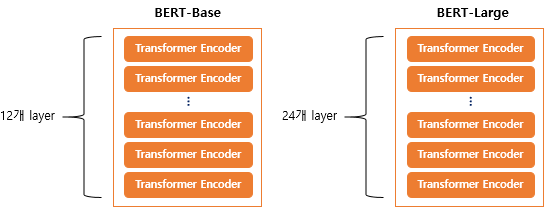

BERT의 기본구조는 트랜스포머 인코더를 쌓아올린 구조임. Base 버전에 총 12개를 쌓았으며, Large 버전에 총 24개 쌓음. 그 외에도 Large 버전은 Base 버전보다 d_model의 크기나 셀프 어텐션 헤드(self Attention Heads)의 수가 더 큼. 트랜스포머 인코더 층의 수를 L, d_model의 크기를 D, 셀프 어텐션 헤드의 수를 A라고 하면, 각각의 크기는 다음과 같음

* BERT-Base : L=12, D=768, A=12 : 110M개의 파라미터
* BERT-Large : L=24, D=1024, A=16 : 340M개의 파라미터

초기 트랜스포머 모델이 L=6, D=512, A=8이었던 것에 비해, Base 모델이 크며, 이는 Open AI GPT-1과 하이퍼 파라미터가 동일함

BERT-Large는 BERT의 최대 성능을 보여주기 위해 만들어진 모델임. 여기에서는 편의상 BERT-BASE를 기준으로 설명함

### 3. BERT의 문맥을 반영한 임베딩(Contextual Embedding)
---------------------------------------
BERT는 ELMo나 GPT-1와 마찬가지로 문맥을 반영한 임베딩(Contextual Embedding)을 사용하고 있음

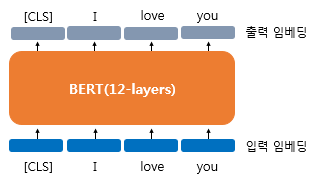

BERT 입력은 앞서 배운 딥러닝 모델들과 마찬가지로 임베딩층(Embedding layer)를 지난 임베딩 벡터들임. d_model을 768로 정의하였기 때문에 모든 단어들은 768차원의 임베딩 벡터가 되어 BERT 입력으로 사용됨.

BERT는 내부적인 연산을 거친 후, 동일하게 각 단어에 대해 768차원의 벡터를 출력함. 위의 그림에서 BERT가 각 768차원의 [CLS], I, love, you라는 4개의 벡터를 입력받아서(임베딩) 동일하게 768차원의 4개의 벡터를 출력하는 모습을 보여줌(출력 임베딩)

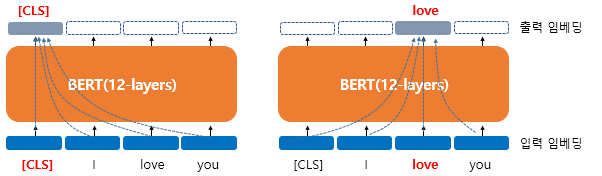

BERT의 연산을 거친 후의 출력 임베딩은 문장의 문맥을 모두 참고한 문맥을 반영한 임베딩이 됨. 위의 좌측 그림에서 [CLS] 벡터는 BERT의 초기입력으로 사용된 입력 임베딩 당시에는 단순히 임베딩층(embedding layer)을 지난 임베딩 벡터였지만, BERT를 지나고 나서는 [CLS], I, love, you 각 단어들의 임베딩벡터들을 모두 참고한 후에 문맥정보를 가진 벡터가 됨

좌측 그림에서는 모든 단어를 참고하고 있다는 것을 화살표로 보여줌

이는 [CLS]라는 단어 벡터뿐만 아니라 다른 벡터들도 전부 마찬가지임. 가령 우측의 그림에서 출력 임베딩 단계의 love를 보면 BERT 입력이었던 모든 단어들인 [CLS], I, love, you를 참고함

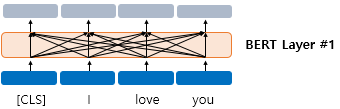

하나의 단어가 모든 단어를 참고하는 연산은 BERT의 12개 층에서 모두 이루어짐. 12개 층을 지난 후에 최종적으로 출력 임베딩을 얻게 됨(위의 그림). 가령 위의 그림은 BERT의 첫번째 층에 입력된 각 단어가 모든 단어를 참고한 후에 출력되는 과정을 화살표로 표현함

BERT의 첫번째 층의 출력 임베딩은 BERT의 두번째 층에서 입력임베딩이 됨

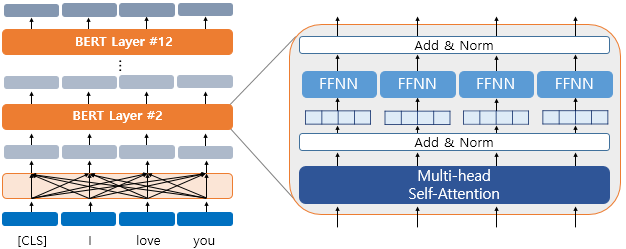

그렇다면 BERT는 어떻게 모든 단어들을 참고하여 문맥을 반영한 출력 임베딩을 얻게 되는 것일까?


실제 BERT에서는 "셀프 어텐션"을 사용. 트랜스포머 인코더를 12번 쌓은 것이므로, 각 층마다 멀티헤드 어텐션과 포지션 와이즈피드 FNN을 수행함


### 4. BERT의 서브워드 토크나이저 : WordPiece
--------------------------------------
BERT는 단어보다 더 작은 단위로 쪼개는 서브워드 토크나이저를 사용함. BERT가 사용한 토크나이저는 WordPiece 토크나이저로 Byte Pair Encoding(BPE) 알고리즘과 유사함

동작방식은 조금 다르지만, 글자로부터 서브워드들을 병합해가는 방식으로 최종 단어 집합을 만드는 것은 BPE와 유사함

서브워드 토크나이저는 자주 등장하는 단어는 단어집합에 추가하지만, 자주 등장하지 않는 단어의 경우, 더 작은 단어인 서브워드로 분리되어 서브워드들이 단어 집합에 추가된다는 아이디어를 갖고 있음.

이렇게 단어 집합이 만들어지고 나면, 이 단어 집합을 기반으로 토큰화가 수행됨. 이는 대표적인 서브워드 토크나이저 패키지인 SentencePiece 실습을 통해 이해한 내용임. BERT의 서브워드 토크나이저도 이와 마찬가지로 동작함

BERT의 토큰화 방식은 다음과 같음

예를 들어, embeddings이라는 단어가 입력으로 들어올때, BERT의 단어집합에 해당 단어가 존재하지 않는다고 하면, 서브워드 토크나이저가 아닌 토크나이저라면 여기서 OOV 문제가 발생함

그러나 서브워드 토크나이저의 경우에는 해당 단어가 단어 집합에 존재하지 않았다고 해서, 서브워드 또한 존재하지 않는다는 의미가 아니므로 해당 단어를 더 쪼개려고 시도함. 만약 BERT의 단어집합에 ##bed, ##ding, #s라는 서브워드들이 존재한다면, embeddings는 em, ##bed, ##ding, #s로 분리됨. 여기서 ##은 이 서브워드들이 단어의 중간부터 등장하는 서브워드라는 것을 알려주는 기호임. 나중에 복원할 때 사용함

In [12]:
import pandas as pd
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")  # Bert-base 토큰나이저

'Here is the sentence I want embeddings for.'라는 문장을 BERT의 토크나이저가 어떻게 토큰화하는지 확인!!

In [13]:
result = tokenizer.tokenize('Here is the sentence I want embeddings for.')
print(result)

['here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.']


embeddings라는 단어는 단어집합에 존재하지 않으므로 em, ##bed, ##ding, #s로 분리됨. 실제 BERT의 단어집합에 특정단어가 있는지 조회하려면 .vocab[]을 통해 가능함

In [14]:
print(tokenizer.vocab['here'])

2182


In [18]:
print(tokenizer.vocab['embeddings'])

KeyError: 'embeddings'

In [16]:
tokenizer.vocab_size

30522

이번에는 BERT의 단어집합 전체를 불러와 BERT의 단어집합을 vocabulary.txt에 저장함

In [20]:
with open('vocabulary.txt', 'w', encoding='utf8') as f:
    for token in tokenizer.vocab.keys():
        f.write(token + '\n')

In [22]:
# 데이터  확인
df = pd.read_fwf('vocabulary.txt', header=None)
df

,0
0,[PAD]
1,[unused0]
2,[unused1]
3,[unused2]
4,[unused3]
...,...
30517,##．
30518,##／
30519,##：
30520,##？


In [23]:
df.loc[4667]

0    ##ding
Name: 4667, dtype: object

참고로 BERT에서 사용되는 특별 토큰들과 그에 맵핑되는 정수는 다음과 같음

* [PAD] - 0
* [UNK] - 100
* [CLS] - 101
* [SEP] - 102
* [MASK] - 103

In [26]:
df.loc[102].values[0]

'[SEP]'

### 5. 포지션 임베딩(Position Embedding)
-----------------------
트랜스포머에서는 포지셔널 인코딩(Positional Encoding) 방법을 통해 단어의 위치 정보를 표현함. 포지셔널 인코딩은 사인함수와 코사인함수를 사용하여 위치에 따른 다른 값을 가지는 행렬을 만들어 사용함

BERT에서는 이와 유사하지만, 위치정보를 사인함수와 코사인함수로 만드는 것이 아니라, **학습을 통해 얻는 포지션 임베딩 방법**을 사용함

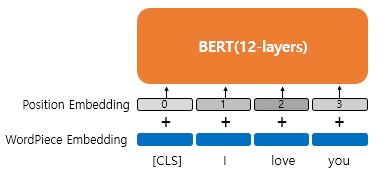

위의 그림에서 WordPiece Embedding은 이미 알고 있는 단어 임베딩으로 실제 입력으로 사용됨. 그리고 이 입력에 포지션 임베딩을 통해 위치정보를 더해 주는데, 포지션 임베딩의 아이디어는 위치정보를 위한 임베딩 층을 하나 더 사용함

예를 들어, 문장 길이가 4라면 4개의 포지션 임베딩 벡터를 학습시킴. 그리고 BERT의 입력마다 다음과 같이 포지션 임베딩 벡터를 더해 줌

* 첫번째 단어의 임베딩 벡터 + 0번 포지션 임베딩 벡터
* 두번째 단어의 임베딩 벡터 + 1번 포지션 임베딩 벡터
* 세번째 단어의 임베딩 벡터 + 2번 포지션 임베딩 벡터
* 네번째 단어의 임베딩 벡터 + 3번 포지션 임베딩 벡터

실제 BERT에서는 문장의 최대길이를 512로 하고 있으므로, 총 512개의 포지션 임베딩 벡터가 학습되며, 두개의 임베딩 층이 사용됨. 단어 집합의 크기가 30,522개인 단어 벡터를 위한 임베딩 층과 문장의 최대길이가 512이므로 512개 포지션 벡터를 위한 임베딩층임

사실 BERT는 세그먼트 임베딩(segment Emebedding)이라는 1개의 임베딩 층을 더 사용함. 

### 6. BERT의 사전훈련(Pre-training)
--------------------------------------
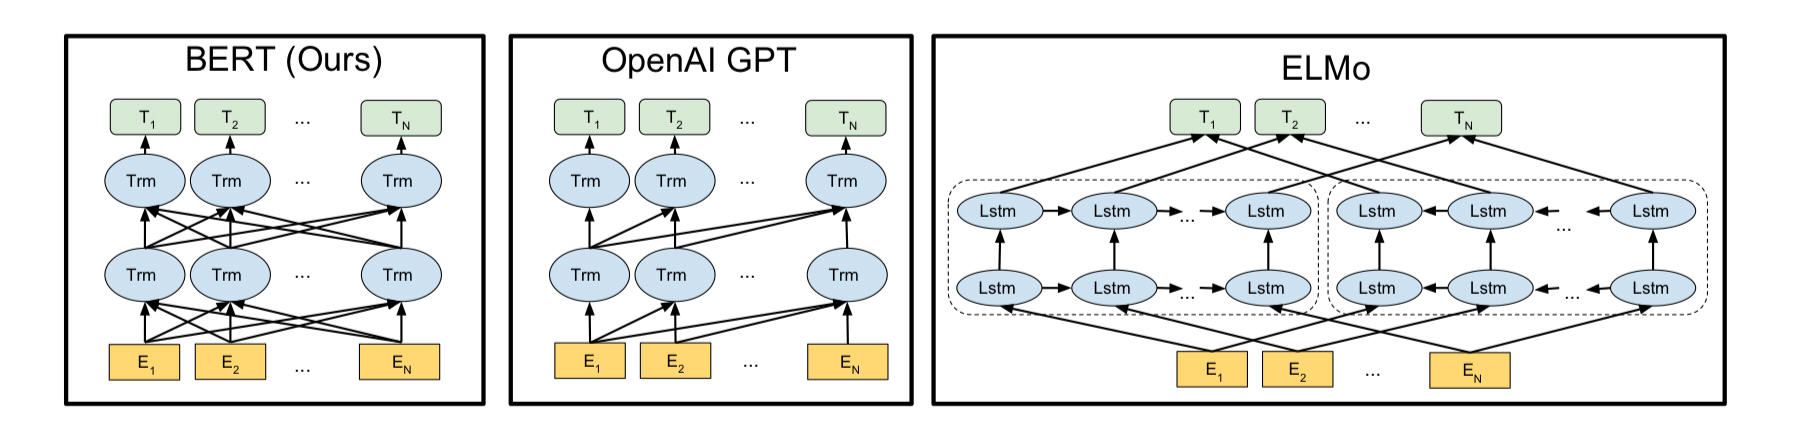

위의 그림은 BERT 논문에 게재된 ELMo와 GPT-1, 그리고 BERT의 구조적인 차이를 보여줌. ELMo는 정방향 LSTM과 역방향 LSTM을 각각 훈련시키는 방식으로 양방향 언어모델을 만듦. GPT-1은 트랜스포머의 디코더를 이전 단어들로부터 다음 단어를 예측하는 방식으로 단방향 언어모델을 만듦(Trm : 트랜스포머, 단방향 -->). 이는 마스크드 언어모델(Masked Language Model)을 통해 양방향성을 얻음. 


BERT의 사전 훈련방법은 크게 두가지로 나뉨. 1) 마스크드 언어모델, 2) 다음 문장 예측(Next Sentence Prediction, NSP) 

논문에 따르면 BERT는 BookCorpus(8억 단어)와 위키피디아(25억 단어)로 학습됨


#### 6-1. 마스크드 언어 모델(Masked Language Model, MLM)

BERT는 사전훈련을 위해 입력으로 들어가는 입력텍스트의 15% 단어를 랜덤으로 마스킹함. 그리고 가려진 단어들(masked words)을 예측하도록 함. 중간에 단어들에 구멍을 뚫어 놓고, 구멍에 들어갈 단어들을 예측하게 하는 식임. 예를 들어, '나는 [MASK]에 가서 그곳에서 빵과 [MASK]를 샀다'를 주고 '슈퍼'와 '우유'를 맞추게 함.

더 정확히는 전부 [MASK]를 변경하지 않고, 랜덤으로 선택된 15% 단어들은 다시 다음과 같은 비율로 규칙이 적용됨

* 80%의 단어들은 [MASK]로 변경한다.
    * Ex) The man went to the store → The man went to the [MASK]

* 10%의 단어들은 랜덤으로 단어가 변경된다.
    * Ex) The man went to the store → The man went to the dog

* 10%의 단어들은 동일하게 둔다.
    * Ex) The man went to the store → The man went to the store
    
이러한 규칙을 설정하는 이유는, [MASK]만 사용할 경우(??) [MASK] 토큰이 파인 튜닝 단계에서는 나타나지 않으므로, 사전학습 단계와 파인튜닝 단계에서 불일치가 발생함. 이 문제를 완화하기 위해 랜덤으로 선택된 15% 단어들의 모든 토큰을 [MASK]로 사용하지 않음. 이를 전체 단어 관점에서 그래프를 통해 정리하면 다음과 같음

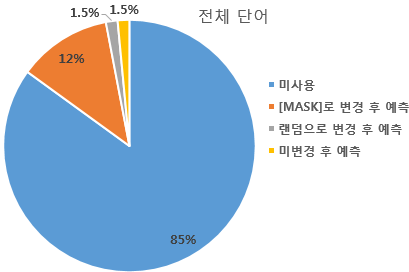

전체 단어의 85%는 마스크드 언어모델의 학습에 사용되지 않음. 학습에 사용되는 12%는 [MASK]로 변경 후에 원래 단어를 예측함. 1.5%는 랜덤으로 단어가 변경된 후에 단어를 예측함. 1.5%는 단어가 변경되지 않지만 BERT는 이 단어가 변경된 단어인지 원래 단어가 맞는지는 알 수 없음. 이 경우에도 BERT는 원래 단어가 무엇인지 예측함

예시를 통해 살펴보면, 'My dog is cute. he likes playing'라는 문장에서는 전처리와 서브워드 토크나이저에 의해  ['my', 'dog', 'is' 'cute', 'he', 'likes', 'play', '##ing']로 토큰화되어 BERT의 입력으로 사용됨. 그리고 언어모델 학습을 위해 다음과 같이 데이터가 변경되었다고 가정해 봄

* 'dog' 토큰은 [MASK]로 변경됨
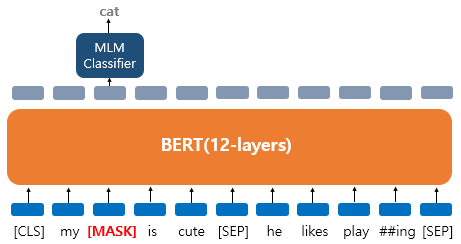

여기서 출력층에 있는 다른 위치의 벡터들은 예측과 학습에 사용되지 않고, 'dog' 위치의 출력층 벡터만 사용됨. 구체적으로는 BERT 손실함수에서 다른 위치의 예측은 무시함. 출력층에서는 예측을 위해 단어집합 크기만큼의 밀집층(dense layer)에 소프트맥스함수가 사용된 1개의 층을 사용하여 원래 단어가 무엇인지 맞추게 됨. 그런데 만약 'dog'만 변경된 것이 아니라 다음과 같이 데이터셋이 변경되었다면 어떨까? 이번에는 세가지 유형 모두에 대해 가정해 봄

* 'dog' 토큰은 [MASK]로 변경되었습니다.
* 'he'는 랜덤 단어 'king'으로 변경되었습니다.
* 'play'는 변경되진 않았지만 예측에 사용됩니다.

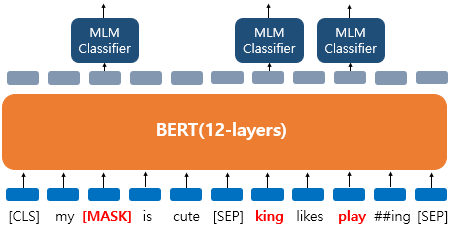

BERT는 랜던 단어 'king'으로 변경된 토큰에 대해서도 원래 단어가 무엇인지, 변경되지 않은 단어 'play'에 대해서도 원래 단어가 무엇인지 예측해야 함. 'play'는 변경되지 않았지만 BERT 입장에서는 이것이 변경된 단어인지 아닌지 알 수 없기 때문에, 마찬가지로 원래 단어를 예측하는 것임. 

BERT는 마스크드 언어모델 외에 다음 문장 예측이라는 다른 태스크를 학습함

#### 6-2. 다음 문장 예측(Next Sentence Prediction, NSP)
BERT는 두개의 문장을 준 후에 이 문장이 이어지는 문장인지 아닌지 맞추는 방식으로 학습됨.  이를 위해 50:50 비율로 실제 이어지는 두개의 문장과 랜덤으로 이어붙인 두개의 문장을 주고 훈련시킴. 이를 각각 Sentence A와 Sentence B라고 하였을때, 다음의 예는 문장의 연속성을 확인한 경우와 그렇지 않은 경우를 보여줌

* 이어지는 문장의 경우
    * Sentence A : The man went to the store.
    * Sentence B : He bought a gallon of milk.
    * Label = IsNextSentence

* 이어지는 문장이 아닌 경우 경우
    * Sentence A : The man went to the store.
    * Sentence B : dogs are so cute.
    * Label = NotNextSentence

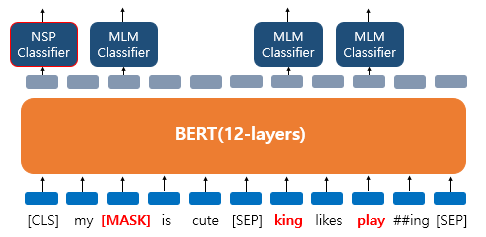


BERT의 입력으로 넣을 때는 [SEP]이라는 특별 토큰을 사용해서 문장을 구분함. 첫번째 문장의 끝에 [SEP] 토큰을 넣고, 두번째 문장이 끝나면 역시 [SEP] 토큰을 붙여줌. 그리고 이 두 문장이 실제 이어지는 문장인지 아닌지를 **[CLS] 토큰 위치의 출력층에서 이진 분류 문제를 풀도록 함.** [CLS] 토큰은 BERT가 분류 문제를 풀기 위해 추가된 특별 토큰임. 그리고 위의 그림에서 나타난 것과 같이 마스크드 언어 모델과 다음 문장 예측은 따로 학습하는 것이 아닌 loss를 합하여 학습이 동시에 이루어짐

BERT가 언어 모델 외에도 다음 문장 예측이라는 태스크를 학습하는 이유는 BERT가 풀고자 하는 태스크 중에서는 QA(Question Answering)나 NLI(Natural Language Inference)와 같이 두 문장의 관계를 이해하는 것이 중요한 태스크들이 있기 때문임.


### 7. 세그먼트 임베딩(Segment Embedding)
--------------------------
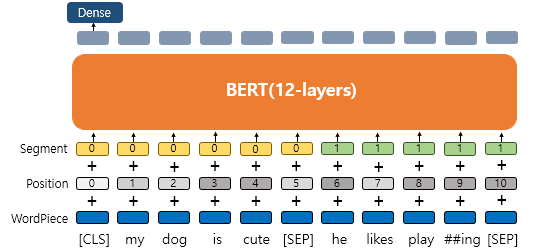

BERT는 QA 등과 같은 두개의 문장 입력이 필요한 태스크를 풀기도 함. 이러한 문장 구분을 위해 세그먼트 임베딩이라는 또 다른 임베딩 층(embedding layer)을 사용함. 첫번째 문장에는 Sentence 0 임베딩, 두번째 문장에는 Sentence 2 임베딩을 더 해주는 방식이며 임베딩 벡터는 두개만 사용됨

결론적으로 BERT는 총 3개의 임베딩 층이 사용됨.

* WordPiece Embedding : 실질적인 입력이 되는 워드 임베딩. 임베딩 벡터의 종류는 단어 집합의 크기로 30,522개.
* Position Embedding : 위치 정보를 학습하기 위한 임베딩. 임베딩 벡터의 종류는 문장의 최대 길이인 512개.
* Segment Embedding : 두 개의 문장을 구분하기 위한 임베딩. 임베딩 벡터의 종류는 문장의 최대 개수인 2개.

주의할 점은 문헌에서 BERT가 문장 중간의 [SEP] 토큰과 두 종류의 세그먼트 임베딩을 통해 두개의 문장을 구분하여 입력받는다고 할 수 있으나, 여기서 문장은 실제 우리가 알고 있는 문장 단위가 아님.

예를 들어, QA 문제를 푸는 경우에는 [SEP]와 세그먼트 임베딩을 기준으로 구분되는 [질문(Question), 본문(Paragraph)] 두종류의 텍스트를 입력받지만, Paragraph 1개는 실제 복수의 문장으로 구성될 수 있음. 다시 말해 [SEP]와 세그먼트 임베딩으로 구분되는 BERT의 입력에서 두개의 문장은 실제로 두 종류의 텍스트, 두개의 문서일 수 있음

BERT가 두개의 문장을 입력받을 필요가 없는 경우도 있음. 예를 들어, 영화리뷰분류나 IMDB 리뷰 분류와 같이 감성분류 태스크에서는 한개의 문서에 대해서만 분류하는 것이므로, 이 경우에는 BERT의 전체입력에 Sentence 0 임베딩만 더해 주면 됨. 

아래에서 설명할 1)과 2) 파인튜닝 유형이 그 예라고 할 수 있음

### 8. BERT를 파인 튜닝(Fine-tunning) 하기
-----------------------------
이번에는 사전학습된 BERT에서 풀고자 하는 태스크의 데이터를 추가로 학습시켜 테스트하는 단계가 파인튜닝 단계임. 실질적으로 태스크에 BERT를 사용하는 단계에 해당됨

#### 8-1. 하나의 텍스트에 대한 텍스트 분류 유형(Single Text Classification)

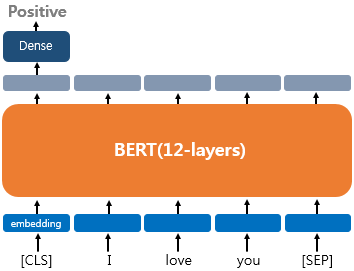

BERT를 사용하는 첫번째 유형은 하나의 문서에 대한 텍스트 분류 유형임. 이 유형은 영화리뷰 감성분류, 로이터 뉴스분류 등과 같이 입력된 문서에 대해 분류를 하는 유형으로 문서의 시작에 [CLS]라는 토큰을 입력함

앞서 사전 훈련 단계에서 다음 문장 예측을 설명할 때, [CLS] 토큰은 BERT가 분류 문제를 풀기 위한 특별 토큰임. 이는 BERT를 실질적으로 사용하는 단계인 파인튜닝 단계에서도 마찬가지임. 텍스트 분류 문제를 풀기 위해 [CLS] 토큰의 위치는 출력층에서 밀집층(dense layer) 또는 완전 연결층(fully-connected layer)이라고 불리는 층들을 추가하여 분류에 대한 예측을 하게 됨


#### 8-2. 하나의 텍스트에 대한 태깅 작업(Tagging)
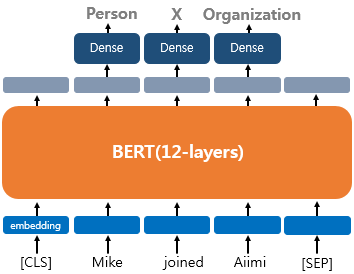

BERT를 사용하는 두번째 유형은 태깅 작업임. 대표적으로 문장의 각 단어에 품사를 태깅하는 품사태깅 작업과 개체를 태깅하는 개체명 인식 작업이 있음. 출력층에서는 입력텍스트의 각 토큰의 위치에 밀집층을 사용하여 분류에 대한 예측을 하게 됨

#### 8-3. 텍스트의 쌍에 대한 분류 또는 회귀문제(Text Pair Classification or Regression)
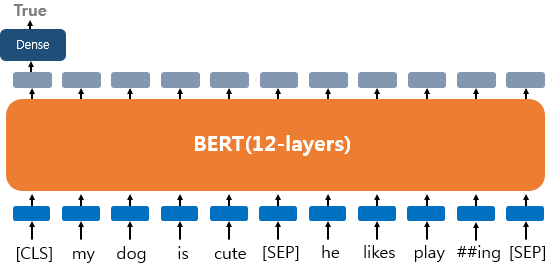


BERT는 텍스트의 쌍을 입력으로 받는 태스크도 풀 수 있음. 텍스트의 쌍을 입력으로 받는 대표적인 태스크로 자연어 추론(Natural Language Inference)이 있음. 자연어 추론 문제란, 두 문장이 주어졌을때 하나의 문장이 다른 문장과 논리적으로 어떤 관계에 있는지를 분류하는 것임. 유형으로는 모순 관계(contradiction), 함의 관계(entailment), 중립관계(neutral)가 있음

텍스트의 쌍을 입력받는 이러한 태스크의 경우에는 입력 텍스트가 1개가 아니므로, 텍스트 사이에 [SEP] 토큰을 집어넣고, Sentence 0 임베딩과 Sentence 1 임베딩이라는 두 종류의 세그먼트 임베딩을 모두 사용하여 문서를 구분함

#### 8-4. 질의 응답(Question Answering)

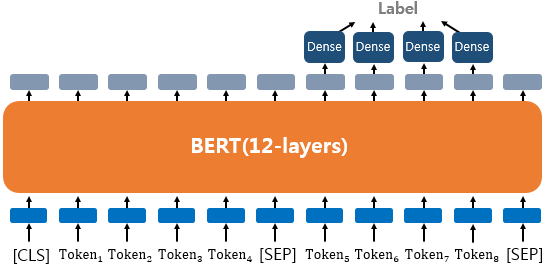

텍스트의 쌍을 입력으로 받는 또다른 태스크로 QA(Question Answering)가 있음. BERT로 QA를 풀기 위해 질문과 본문이라는 두개의 텍스트의 쌍을 입력함. 이 태스크의 대표적인 데이터셋으로 SQuAD(Stanford Question Answering Dataset) v1.1이었음. 이 데이터셋을 푸는 방법은 질문과 본문을 입력받으면, 본문의 일부를 추출해서 질문에 답변하는 것임. 실제로 이 데이터셋을 영어이지만, 한국어로 예시를 들면 다음과 같음.

"강우가 떨어지도록 영향을 주는 것은?" 라는 질문이 주어지고, "기상학에서 강우는 대기 수증기가 응결되어 중력의 영향을 받고 떨어지는 것을 의미합니다. 강우의 주요 형태는 이슬비, 비, 진눈깨비, 눈, 싸락눈, 우박이 있습니다."라는 본문이 주어졌다고 하면, 이 경우, 정답은 "중력"이 됨.


### 9. 그외 기타
---------------------
* 훈련 데이터는 위키피디아(25억 단어)와 BooksCorpus(8억 단어) ≈ 33억 단어
* WordPiece 토크나이저로 토큰화를 수행 후 15% 비율에 대해서 마스크드 언어 모델 학습
* 두 문장 Sentence A와 B의 합한 길이. 즉, 최대 입력의 길이는 512로 제한
* 100만 step 훈련 ≈ (총 합 33억 단어 코퍼스에 대해 40 에포크 학습)
* 옵티마이저 : 아담(Adam)
* 학습률(learning rate) : $10^{-4}$
* 가중치 감소(Weight Decay) : L2 정규화로 0.01 적용
* 드롭 아웃 : 모든 레이어에 대해서 0.1 적용
* 활성화 함수 : relu 함수가 아닌 gelu 함수
* 배치 크기(Batch size) : 256


### 10. 어텐션 마스크(Attention Mask)
--------------------------------
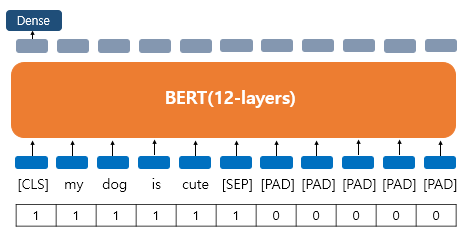

BERT를 실제로 실습하게 되면 어텐션 마스크라는 시퀀스 입력이 추가로 필요함. 어텐션 마스크는 BERT가 어텐션 연산을 할때, 패딩 토큰에 대해 어텐션을 하지 않도록 실제 단어와 패팅 토큰을 구분할 수 있도록 알려주는 입력임. 

이 값은 0과 1 두가지 값을 가지는데, 숫자 1은 해당 토큰은 실제 단어이므로 마스킹을 하지 않는다는 의미임. 위의 그림과 같이 실제 단어의 위치에는 1, 패딩 토큰위치에는 0의 값을 가지는 시퀀스를 만들어 BERT의 또 다른 입력으로 사용하면 됨

